<a href="https://colab.research.google.com/github/Rogerio-mack/work/blob/main/EE_python_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt             
%matplotlib inline
import seaborn as sns


# **Gráficos com `Matplotlib`**
<hr>

In [ ]:
!pip install yfinance
!pip install yahoofinancials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-py3-none-any.whl size=15192 sha256=b6e847b4676d8298092f0511cd6f2ad5fb7fda31c2c7e3ecd2b379a4bfe41a09
  Stored in directory: /root/.cache/pip/wheels/4b/63/46/e7110bfee88685fe69e338d1b14d1748921862aa57b6705b60
Successfully built yahoofinancials


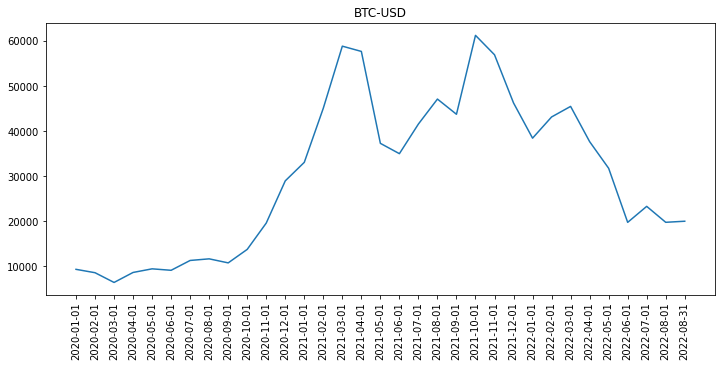

In [ ]:
from yahoofinancials import YahooFinancials

# stock_name = 'USDBRL=X'
# stock_name = 'PETR4.SA'
stock_name = 'BTC-USD'

yahoo_financials = YahooFinancials(stock_name)
data=yahoo_financials.get_historical_price_data("2020-01-01", "2022-08-31", "monthly")
stock_df = pd.DataFrame(data[stock_name]['prices'])
stock_df = stock_df.drop('date', axis=1).set_index('formatted_date')
stock_df.head()

plt.figure(figsize=(12,5))
plt.plot(stock_df.close)
plt.xticks(rotation=90)
plt.title(stock_name)
plt.show()

In [ ]:
# https://dados.gov.br/dataset/serie-historica-de-precos-de-combustiveis-por-revenda
# 4 ultimas semanas gasolina etanol

df = pd.read_csv('https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/qus/ultimas-4-semanas-diesel-gnv-2.csv',sep=';')
display( df.head() )
print(df.shape)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,S,PR,PATO BRANCO,SANTOS & MERLO LTDA.,79.854.667/0001-01,RUA TOCANTINS,2535,NaN,CENTRO,85501-010,DIESEL S10,04/07/2022,"7,55",NaN,R$ / litro,RODOIL
1,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0005-75,AVENIDA BOULEVARD THAUMATURGO,1031,NaN,CENTRO,69980-000,DIESEL S10,07/07/2022,"8,98",NaN,R$ / litro,VIBRA ENERGIA
2,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0005-75,AVENIDA BOULEVARD THAUMATURGO,1031,NaN,CENTRO,69980-000,DIESEL,07/07/2022,"8,95",NaN,R$ / litro,VIBRA ENERGIA
3,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0006-56,AVENIDA 25 DE AGOSTO,1350,NaN,25 DE AGOSTO,69980-000,DIESEL S10,07/07/2022,"8,98",NaN,R$ / litro,VIBRA ENERGIA
4,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0006-56,AVENIDA 25 DE AGOSTO,1350,NaN,25 DE AGOSTO,69980-000,DIESEL,07/07/2022,"8,95",NaN,R$ / litro,VIBRA ENERGIA


(29693, 16)


In [ ]:
df.columns

Index(['Regiao - Sigla', 'Estado - Sigla', 'Municipio', 'Revenda',
       'CNPJ da Revenda', 'Nome da Rua', 'Numero Rua', 'Complemento', 'Bairro',
       'Cep', 'Produto', 'Data da Coleta', 'Valor de Venda', 'Valor de Compra',
       'Unidade de Medida', 'Bandeira'],
      dtype='object')

In [ ]:
try:
  print( df['Valor de Venda'].mean() )
except:
  print('Erro ao calcular a média... provavelmente dados não numéricos')
  print( df['Valor de Venda'].dtype )


Erro ao calcular a média... provavelmente dados não numéricos
object


In [ ]:
df['Valor de Venda']

0        7,55
1        8,98
2        8,95
3        8,98
4        8,95
         ... 
29688    7,38
29689    7,28
29690    7,04
29691    7,19
29692    7,09
Name: Valor de Venda, Length: 29693, dtype: object

In [ ]:
df['Valor de Venda'] = df['Valor de Venda'].str.replace(',','.')
df['Valor de Venda'] = df['Valor de Venda'].astype('float')

try:
  print( df['Valor de Venda'].mean() )
except:
  print('Erro ao calcular a média... provavelmente dados não numéricos')
  print( df['Valor de Venda'].dtype )

7.438552655508032


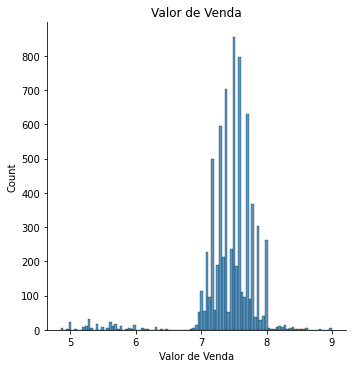

In [ ]:
sns.displot(df[ df['Estado - Sigla'] == 'SP' ]['Valor de Venda'])
plt.title('Valor de Venda')
plt.show()

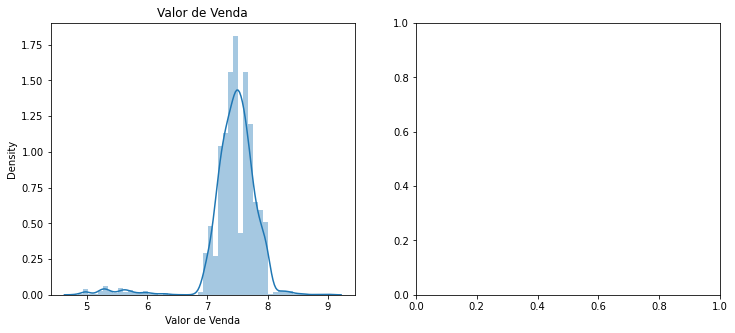

In [ ]:
import warnings
warnings.filterwarnings("ignore")

fig, ax = plt.subplots(1,2,figsize=(12,5))

sns.distplot(df[ df['Estado - Sigla'] == 'SP' ]['Valor de Venda'], ax=ax[0])
ax[0].set_title('Valor de Venda')

plt.show()

warnings.filterwarnings(action="default")

In [67]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [71]:
!ls /root/.kaggle/

kaggle.json


In [75]:
!kaggle datasets download -d leonardopena/top50spotify2019

  0% 0.00/2.31k [00:00<?, ?B/s]
100% 2.31k/2.31k [00:00<00:00, 1.47MB/s]


In [76]:
!ls /content


kaggle.json  sample_data  spotify-music-analysis.log  top50spotify2019.zip


In [77]:
!unzip top50spotify2019.zip
!ls /content

Archive:  top50spotify2019.zip
  inflating: top50.csv               
kaggle.json  spotify-music-analysis.log  top50spotify2019.zip
sample_data  top50.csv


In [79]:
!cat /content/top50.csv

"","Track.Name","Artist.Name","Genre","Beats.Per.Minute","Energy","Danceability","Loudness..dB..","Liveness","Valence.","Length.","Acousticness..","Speechiness.","Popularity"
"1","Se�orita","Shawn Mendes","canadian pop",117,55,76,-6,8,75,191,4,3,79
"2","China","Anuel AA","reggaeton flow",105,81,79,-4,8,61,302,8,9,92
"3","boyfriend (with Social House)","Ariana Grande","dance pop",190,80,40,-4,16,70,186,12,46,85
"4","Beautiful People (feat. Khalid)","Ed Sheeran","pop",93,65,64,-8,8,55,198,12,19,86
"5","Goodbyes (Feat. Young Thug)","Post Malone","dfw rap",150,65,58,-4,11,18,175,45,7,94
"6","I Don't Care (with Justin Bieber)","Ed Sheeran","pop",102,68,80,-5,9,84,220,9,4,84
"7","Ransom","Lil Tecca","trap music",180,64,75,-6,7,23,131,2,29,92
"8","How Do You Sleep?","Sam Smith","pop",111,68,48,-5,8,35,202,15,9,90
"9","Old Town Road - Remix","Lil Nas X","country rap",136,62,88,-6,11,64,157,5,10,87
"10","bad guy","Billie Eilish","electropop",135,43,70,-11,10,56,194,33,38,95
"11","Callaita","Bad

In [91]:
df = pd.read_csv('/content/top50.csv',encoding='ISO-8859-1',index_col=0)
df.head()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


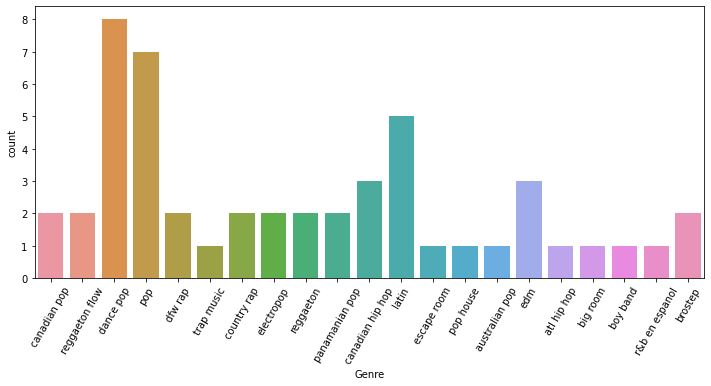

In [92]:
plt.figure(figsize=(12,5))

sns.countplot(x=df.Genre)
plt.xticks(rotation=60)
plt.show()

In [94]:
df.groupby('Genre')['Track.Name'].count()

Genre
atl hip hop         1
australian pop      1
big room            1
boy band            1
brostep             2
canadian hip hop    3
canadian pop        2
country rap         2
dance pop           8
dfw rap             2
edm                 3
electropop          2
escape room         1
latin               5
panamanian pop      2
pop                 7
pop house           1
r&b en espanol      1
reggaeton           2
reggaeton flow      2
trap music          1
Name: Track.Name, dtype: int64

In [103]:
df2 = pd.DataFrame(df.groupby('Genre')['Genre'].count())
df2 = df2.rename(columns={'Genre':'Qty'})
df2 = df2.reset_index()

In [104]:
df2.head()

,Genre,Qty
0,atl hip hop,1
1,australian pop,1
2,big room,1
3,boy band,1
4,brostep,2


In [87]:
!kaggle datasets download -d leonardopena/top-spotify-songs-from-20102019-by-year
!ls /content

  0% 0.00/19.3k [00:00<?, ?B/s]
100% 19.3k/19.3k [00:00<00:00, 15.3MB/s]
kaggle.json		    top50.csv
sample_data		    top50spotify2019.zip
spotify-music-analysis.log  top-spotify-songs-from-20102019-by-year.zip


In [88]:
!unzip /content/top-spotify-songs-from-20102019-by-year.zip
!ls /content

Archive:  /content/top-spotify-songs-from-20102019-by-year.zip
  inflating: top10s.csv              
kaggle.json		    top50.csv
sample_data		    top50spotify2019.zip
spotify-music-analysis.log  top-spotify-songs-from-20102019-by-year.zip
top10s.csv


In [89]:
df = pd.read_csv('/content/top10s.csv',encoding='ISO-8859-1',index_col=0)
df.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [116]:
!kaggle datasets download -d quantbruce/real-estate-price-prediction
!ls /content

  0% 0.00/6.98k [00:00<?, ?B/s]
100% 6.98k/6.98k [00:00<00:00, 5.65MB/s]
kaggle.json			  top10s.csv
real-estate-price-prediction.zip  top50.csv
sample_data			  top50spotify2019.zip
spotify-music-analysis.log	  top-spotify-songs-from-20102019-by-year.zip


In [118]:
!unzip real-estate-price-prediction.zip
!ls /content

Archive:  real-estate-price-prediction.zip
  inflating: Real estate.csv         
 kaggle.json			    top10s.csv
'Real estate.csv'		    top50.csv
 real-estate-price-prediction.zip   top50spotify2019.zip
 sample_data			    top-spotify-songs-from-20102019-by-year.zip
 spotify-music-analysis.log


In [131]:
df = pd.read_csv('/content/Real estate.csv')
display( df.head() )
print(df.shape)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


(414, 8)


In [132]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [135]:
columns_names = df.columns
df.columns = [x.split(' ')[0] for x in df.columns]
df.head()

,No,X1,X2,X3,X4,X5,X6,Y
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [136]:
df.columns

Index(['No', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'Y'], dtype='object')

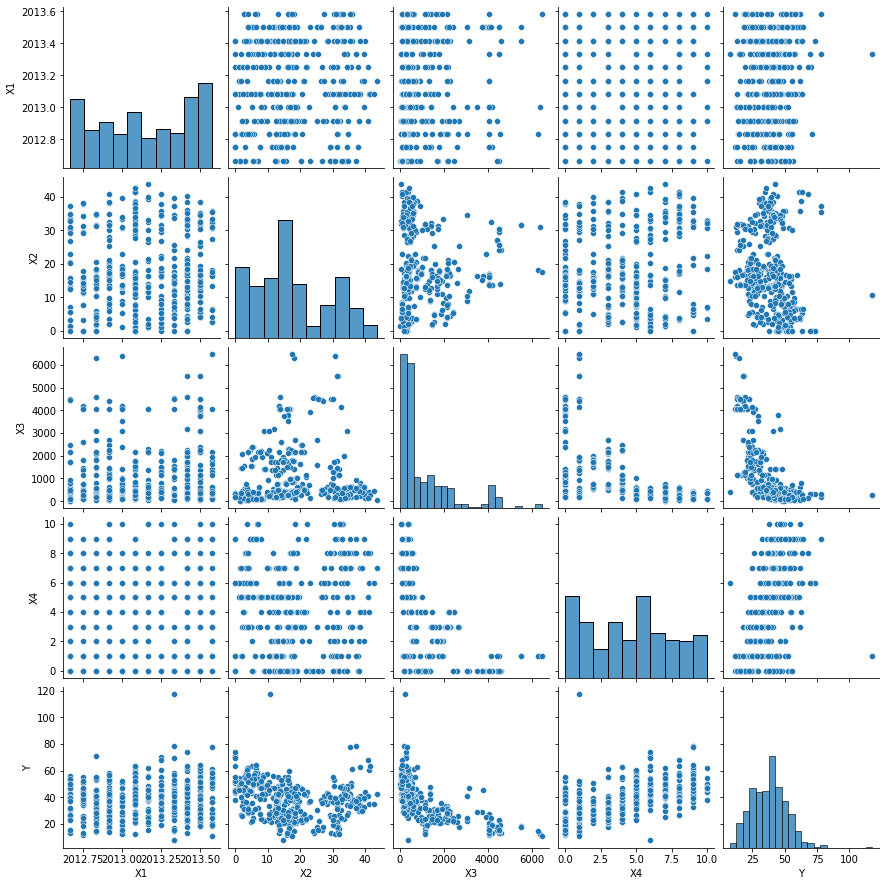

In [138]:
sns.pairplot(df[['X1', 'X2', 'X3', 'X4', 'Y']])
plt.show()

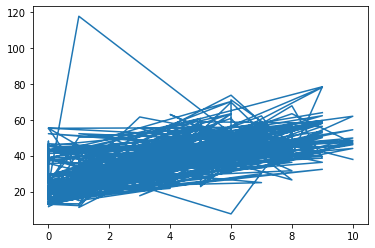

In [139]:
plt.plot(df['X4'],df['Y'])
plt.show()

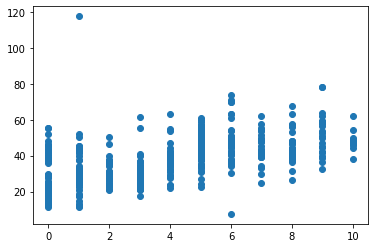

In [140]:
plt.scatter(df['X4'],df['Y'])
plt.show()

In [141]:
import statsmodels.formula.api as sm

lm = sm.ols(formula='Y ~ X4', data=df)

lm = lm.fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     199.3
Date:                Wed, 31 Aug 2022   Prob (F-statistic):           3.41e-37
Time:                        20:28:20   Log-Likelihood:                -1586.0
No. Observations:                 414   AIC:                             3176.
Df Residuals:                     412   BIC:                             3184.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.1811      0.942     28.857      0.0

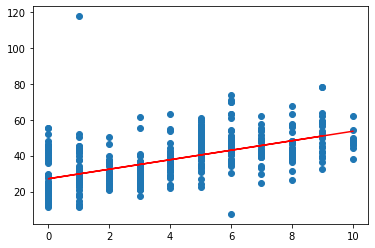

In [143]:
plt.scatter(df['X4'],df['Y'])
plt.plot(df['X4'],lm.predict(df['X4']),color='r')
plt.show()